In [1]:
import torch
from torchvision.transforms import v2
import torchvision.io as tv_io
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import glob


import json

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [2]:
from torchvision.models import resnet50, ResNet50_Weights

from torchvision.models import vgg16
from torchvision.models import VGG16_Weights

# Using PreTrained VGG16 with default weights.

weights = VGG16_Weights.DEFAULT
model = vgg16(weights=weights)

[More PyTorch Models](https://docs.pytorch.org/vision/stable/models.html)

In [3]:
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [4]:
pre_trans = weights.transforms()
pre_trans

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

## Freezing the Model

Before you add your layers to the pre-trained model, it is important to freeze the model so we don't update the base layers. We want to retain the learning from the base layers. We will only update the new layers we add. You can update the base layers through a process called fine-tuning.

In [5]:
# Freeze the model
model.requires_grad_(False)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## Adding New Layers



In [6]:
num_classes = 1

abby_detector_model = nn.Sequential(
    model,
    nn.Linear(1000, num_classes)
)

abby_detector_model.to(device)

Sequential(
  (0): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [7]:
# Only dealing with binary classification

loss_func = nn.BCEWithLogitsLoss()
optimizer = Adam(abby_detector_model.parameters())

abby_detector_model.to(device)

Sequential(
  (0): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): M

In [8]:
pres_trans = weights.transforms

In [9]:
# Building Dataset

DATA_LABELS = ["abby", "not_abby"]

class AnimalDataset(Dataset):
  def __init__(self, data_dir):
    self.imgs = []
    self.labels = []

    for l_idx, label in enumerate(DATA_LABELS):
            data_paths = glob.glob(data_dir + label + '/*.jpg', recursive=True)
            for path in data_paths:
                img = Image.open(path)
                self.imgs.append(pre_trans(img).to(device))
                self.labels.append(torch.tensor(l_idx).to(device).float())

  def __getitem__(self, idx):
      img = self.imgs[idx]
      label = self.labels[idx]
      return img, label

  def __len__(self):
      return len(self.imgs)


In [10]:
batch_size = 32

train_path = "data/abby_data/train/"
train_data = AnimalDataset(train_path)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
train_N = len(train_loader.dataset)

valid_path = "data/abby_data/valid/"
valid_data = AnimalDataset(valid_path)
valid_loader = DataLoader(valid_data, batch_size=batch_size)
valid_N = len(valid_loader.dataset)






In [11]:
IMG_WIDTH, IMG_HEIGHT = (224, 224)

random_trans = v2.Compose([
    v2.RandomRotation(25),
    v2.RandomResizedCrop((IMG_WIDTH, IMG_HEIGHT), scale=(.8, 1), ratio=(1, 1)),
    v2.RandomHorizontalFlip(),
    v2.ColorJitter(brightness=.2, contrast=.2, saturation=.2, hue=.2)
])

In [12]:
## Training Loop with Sigmoid. if output gt 0, prediction leans that way

def get_batch_accuracy(output, y, N):
    zero_tensor = torch.tensor([0]).to(device)
    pred = torch.gt(output, zero_tensor)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N


def train(model, check_grad=False):
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        output = torch.squeeze(model(random_trans(x)))
        optimizer.zero_grad()
        batch_loss = loss_func(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    if check_grad:
        print('Last Gradient:')
        for param in model.parameters():
            print(param.grad)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

def validate(model):
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            output = torch.squeeze(model(x))

            loss += loss_func(output, y.float()).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [13]:
epochs = 15

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(abby_detector_model, check_grad=False)
    validate(abby_detector_model)

Epoch: 0
Train - Loss: 4.4254 Accuracy: 0.4891
Valid - Loss: 0.8360 Accuracy: 0.6667
Epoch: 1
Train - Loss: 1.8409 Accuracy: 0.8686
Valid - Loss: 0.7958 Accuracy: 0.7037
Epoch: 2
Train - Loss: 1.7691 Accuracy: 0.8759
Valid - Loss: 0.6247 Accuracy: 0.6667
Epoch: 3
Train - Loss: 1.8167 Accuracy: 0.8759
Valid - Loss: 0.4600 Accuracy: 0.7778
Epoch: 4
Train - Loss: 1.4342 Accuracy: 0.8832
Valid - Loss: 0.4327 Accuracy: 0.8148
Epoch: 5
Train - Loss: 1.1914 Accuracy: 0.8978
Valid - Loss: 0.4495 Accuracy: 0.8148
Epoch: 6
Train - Loss: 1.2214 Accuracy: 0.9124
Valid - Loss: 0.3950 Accuracy: 0.8148
Epoch: 7
Train - Loss: 1.1565 Accuracy: 0.8978
Valid - Loss: 0.3495 Accuracy: 0.8148
Epoch: 8
Train - Loss: 1.3698 Accuracy: 0.8978
Valid - Loss: 0.3294 Accuracy: 0.8519
Epoch: 9
Train - Loss: 0.9298 Accuracy: 0.9051
Valid - Loss: 0.3096 Accuracy: 0.8889
Epoch: 10
Train - Loss: 1.1112 Accuracy: 0.9051
Valid - Loss: 0.2801 Accuracy: 0.8519
Epoch: 11
Train - Loss: 0.9137 Accuracy: 0.9124
Valid - Loss: 0.

## Fine Tuning the Model

Unfreeze the model. Train with a SMALL Learning rate so that it takes small steps and slightly improve the model by a small amount.

In [14]:
abby_detector_model.requires_grad_(True)
optimizer = Adam(abby_detector_model.parameters(), lr=1e-7)

In [15]:
epochs = 2 # train with few epochs since ResNet50 is large model and can overfit

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train(abby_detector_model, check_grad=False)
    validate(abby_detector_model)

Epoch: 0
Train - Loss: 1.5669 Accuracy: 0.9124
Valid - Loss: 0.2872 Accuracy: 0.8519
Epoch: 1
Train - Loss: 1.1030 Accuracy: 0.9124
Valid - Loss: 0.2867 Accuracy: 0.8519


In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(image_path):
    image = mpimg.imread(image_path)
    plt.imshow(image)

In [17]:
def make_prediction(file_path):
    show_image(file_path)
    image = Image.open(file_path)
    image = pre_trans(image).to(device)
    image = image.unsqueeze(0)
    output = abby_detector_model(image)
    prediction = output.item()
    return prediction

0.2806277275085449

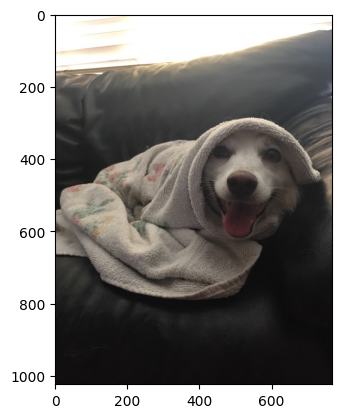

In [18]:
make_prediction('data/abby_data/valid/abby/abby_13.jpg')

In [19]:
def abby_detector(image_path):
    pred = make_prediction(image_path)
    if pred < 0:
        print("It's Abby! Let her in!")
    else:
        print("That's not Abby! Shoot it!")

It's Abby! Let her in!


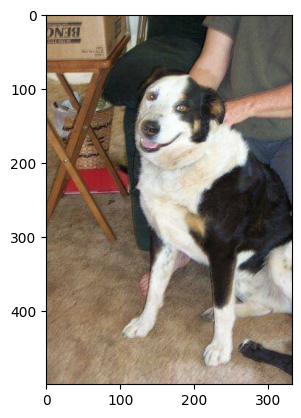

In [20]:
abby_detector('data/abby_data/valid/not_abby/127.jpg')

That's not Abby! Shoot it!


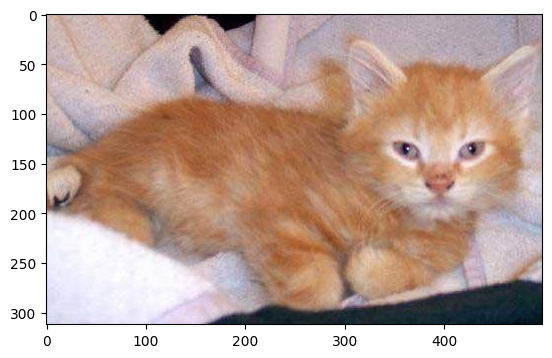

In [21]:
abby_detector('data/abby_data/valid/not_abby/140.jpg')

It's Abby! Let her in!


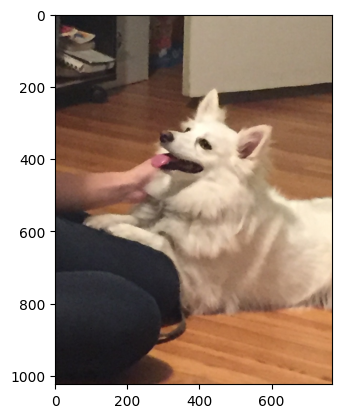

In [22]:
abby_detector('data/abby_data/valid/abby/abby_15.jpg')

It's Abby! Let her in!


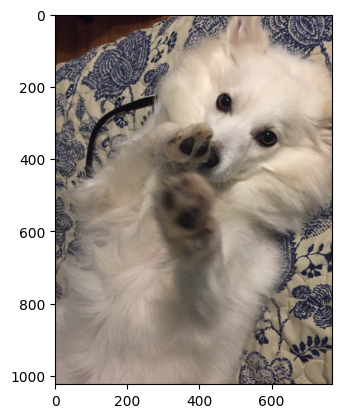

In [23]:
abby_detector('data/abby_data/valid/abby/abby_16.jpg')

It's Abby! Let her in!


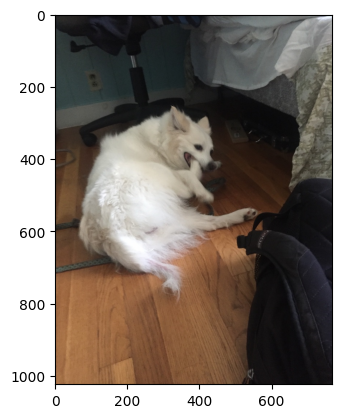

In [24]:
abby_detector('data/abby_data/valid/abby/abby_14.jpg')

It's Abby! Let her in!


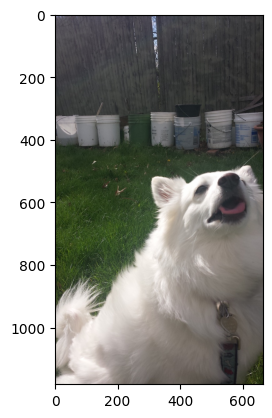

In [25]:
abby_detector('data/abby_data/train/abby/abby_1.jpg')

It's Abby! Let her in!


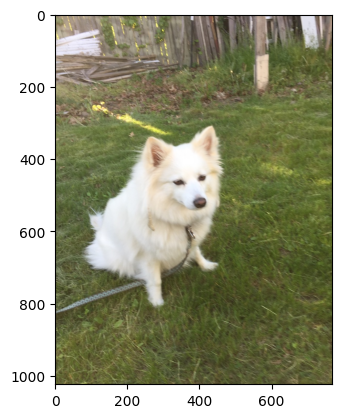

In [26]:
abby_detector('data/abby_data/train/abby/abby_3.jpg')

That's not Abby! Shoot it!


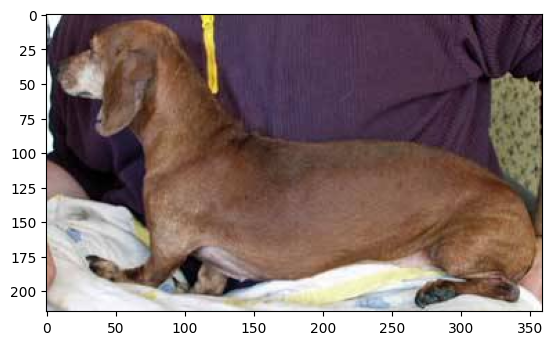

In [27]:
abby_detector('data/abby_data/valid/not_abby/130.jpg')

That's not Abby! Shoot it!


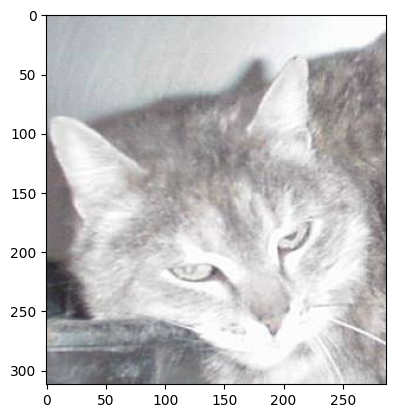

In [28]:
abby_detector('data/abby_data/valid/not_abby/124.jpg')

That's not Abby! Shoot it!


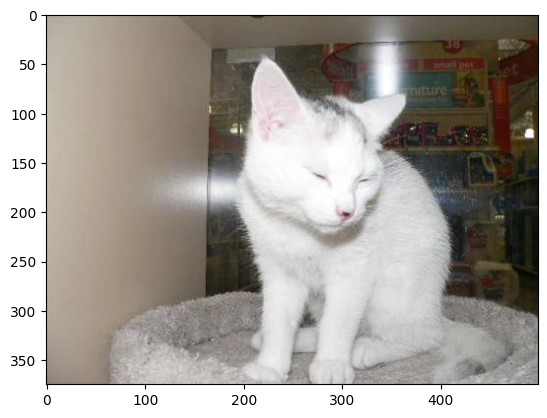

In [29]:
abby_detector('data/abby_data/train/not_abby/34.jpg')

That's not Abby! Shoot it!


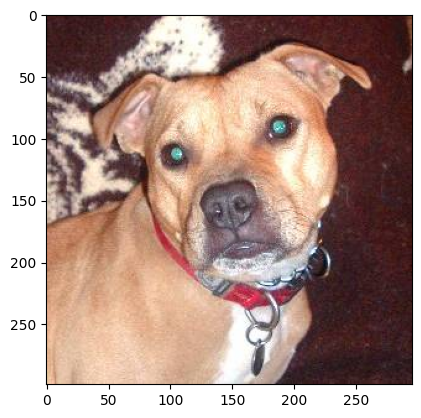

In [30]:
abby_detector('data/abby_data/train/not_abby/2.jpg')

It's Abby! Let her in!


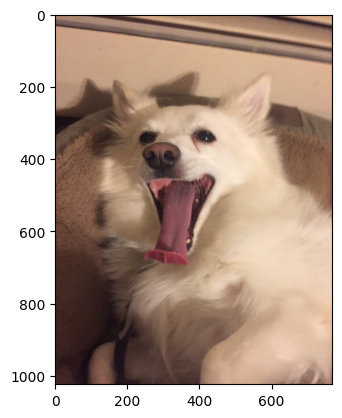

In [31]:
abby_detector('data/abby_data/train/abby/abby_12.jpg')

It's Abby! Let her in!


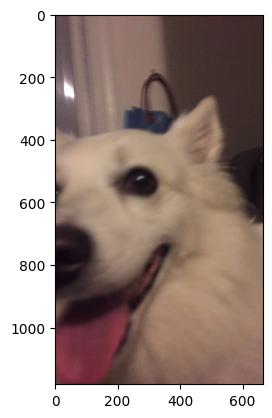

In [32]:
abby_detector('data/abby_data/train/abby/abby_2.jpg')

That's not Abby! Shoot it!


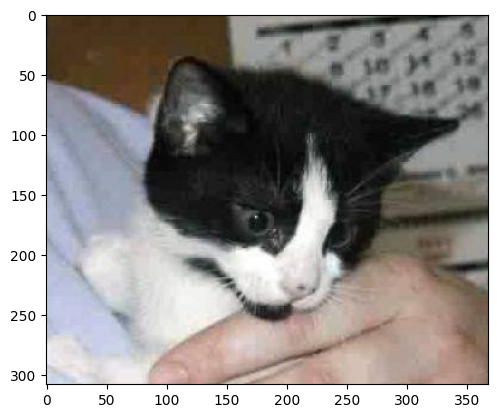

In [33]:
abby_detector('data/abby_data/train/not_abby/50.jpg')

That's not Abby! Shoot it!


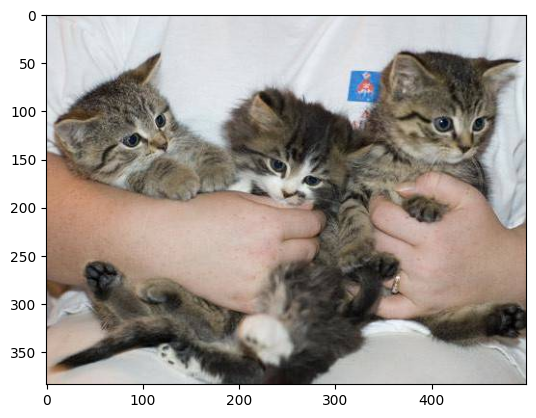

In [34]:
abby_detector('data/abby_data/valid/not_abby/134.jpg')

It's Abby! Let her in!


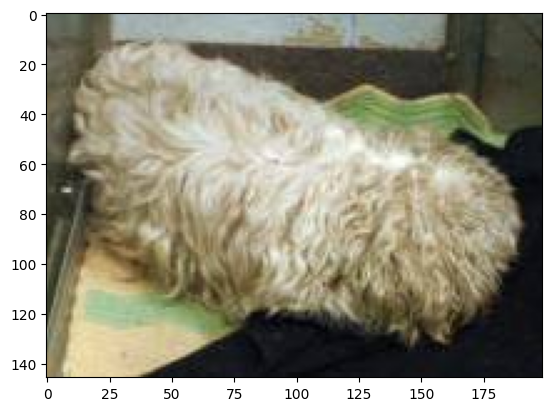

In [35]:
abby_detector('data/abby_data/valid/not_abby/126.jpg')

In [36]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}